# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observation and analysis based on the data plotted

1. Location nearby equator latitude have higher Max Tempurature and temperature decreases as one moves away from the equator towards Norther or Sothern Hemisphere, there is strong positive linear relationship for Northen Hemisphere vs temp and strong negative linear relationship for Sothern Hemisphere vs temp.

2. In Northern and Southern Hemisphere Humidity has no correlated with Latitude.

3. In Northern has no correlated with Latitude and Southern Hemisphere Cloudness seems to have very weak correlated with Latitude.

4. Wind Speed have no correlated to latitude in the Northern and Southern Hemisphere.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import os
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# check point
# print(citipy)
# print(output_data_file)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
#save cofig information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query url
base_url = f"{url}appid={weather_api_key}&units={units}&q="

# check point to build api query request
# query_url = base_url + cities[0]
# weather_response = requests.get(query_url).json()
# pprint(weather_response)

# Set up a list
lat = []           
lng = []           
max_temp = []      
humidity = []      
cloudiness = []    
wind_speed = []    
country = []       
date = []
cities_list = []

# loop through the cities list for requested data

print("Beginning Data Retrieval\n-----------------------------")

city_count = 0
set_count = 1

for city in cities:
    # build query url
    query_url= f"{base_url}+{city}"
    weather_response = requests.get(query_url).json()
    
    try:
        print(f"Processing Record {city_count} of Set {set_count} | {city}")
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        cities_list.append(city)
        
    except:
        print("City not found. Skipping {city}.")
    
    
    city_count += 1
    if city_count == 50:
        city_count = 0
        set_count += 1
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | atuona
Processing Record 1 of Set 1 | tshikapa
Processing Record 2 of Set 1 | athabasca
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | mataura
City not found. Skipping {city}.
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping {city}.
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ust-omchug
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | waipawa
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping {city}.
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | quatre cocos
Processing Record 15 of Set 1 | sovetskiy
Processing Record 16 of Set 1 | champerico
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | ilulissat
Processing Record 20

Processing Record 30 of Set 4 | nanortalik
Processing Record 31 of Set 4 | emerald
Processing Record 32 of Set 4 | vanimo
Processing Record 33 of Set 4 | kodiak
Processing Record 34 of Set 4 | provideniya
Processing Record 35 of Set 4 | brigantine
Processing Record 36 of Set 4 | klaksvik
Processing Record 37 of Set 4 | ponta do sol
Processing Record 38 of Set 4 | novichikha
Processing Record 39 of Set 4 | ensenada
Processing Record 40 of Set 4 | meulaboh
Processing Record 41 of Set 4 | obo
Processing Record 42 of Set 4 | barcelos
Processing Record 43 of Set 4 | suluq
Processing Record 44 of Set 4 | belmonte
Processing Record 45 of Set 4 | cayenne
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | puerto madryn
Processing Record 48 of Set 4 | muriwai beach
Processing Record 49 of Set 4 | vallenar
Processing Record 0 of Set 5 | alyangula
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | lagoa
Processi

Processing Record 18 of Set 8 | khandbari
Processing Record 19 of Set 8 | san jose
Processing Record 20 of Set 8 | sampit
Processing Record 21 of Set 8 | caraquet
Processing Record 22 of Set 8 | half moon bay
Processing Record 23 of Set 8 | nagua
Processing Record 24 of Set 8 | caravelas
Processing Record 25 of Set 8 | tikrit
Processing Record 26 of Set 8 | tazovskiy
Processing Record 27 of Set 8 | natal
Processing Record 28 of Set 8 | mabaruma
Processing Record 29 of Set 8 | roebourne
Processing Record 30 of Set 8 | manhattan
Processing Record 31 of Set 8 | ixtapa
Processing Record 32 of Set 8 | malindi
Processing Record 33 of Set 8 | gimli
Processing Record 34 of Set 8 | charcas
Processing Record 35 of Set 8 | souillac
Processing Record 36 of Set 8 | karkaralinsk
City not found. Skipping {city}.
Processing Record 37 of Set 8 | waverly
Processing Record 38 of Set 8 | neryungri
Processing Record 39 of Set 8 | nakuru
Processing Record 40 of Set 8 | mikhaylov
Processing Record 41 of Set 

Processing Record 0 of Set 12 | safranbolu
Processing Record 1 of Set 12 | sawakin
Processing Record 2 of Set 12 | kavieng
Processing Record 3 of Set 12 | basco
Processing Record 4 of Set 12 | taltal
Processing Record 5 of Set 12 | evensk
Processing Record 6 of Set 12 | madison
Processing Record 7 of Set 12 | sept-iles
Processing Record 8 of Set 12 | colares
Processing Record 9 of Set 12 | mount isa
Processing Record 10 of Set 12 | miandrivazo
Processing Record 11 of Set 12 | salisbury
Processing Record 12 of Set 12 | kamenskoye
City not found. Skipping {city}.
Processing Record 13 of Set 12 | san lawrenz
City not found. Skipping {city}.
Processing Record 14 of Set 12 | tumut
Processing Record 15 of Set 12 | salta
Processing Record 16 of Set 12 | juneau
Processing Record 17 of Set 12 | easley
Processing Record 18 of Set 12 | burdur
Processing Record 19 of Set 12 | alice springs
Processing Record 20 of Set 12 | suda
Processing Record 21 of Set 12 | mukhen
Processing Record 22 of Set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# format data to dataframe
city_data = pd.DataFrame({"City": cities_list,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp": max_temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country,
                           "Date": date})

# count length of columns
city_data.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [37]:
# show the top dataframe
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.80,-139.03,80.47,76,3,14.47,PF,1593400402
1,tshikapa,-6.42,20.80,70.21,53,20,2.84,CD,1593400402
2,athabasca,54.72,-113.29,57.92,87,100,10.18,CA,1593400402
3,karratha,-20.74,116.85,81.84,21,3,5.99,AU,1593400402
4,tuktoyaktuk,69.45,-133.04,48.20,81,20,9.17,CA,1593400402


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,21.169593,14.755527,67.090407,71.706100,47.689464,8.274972,1.593400e+09
std,33.815110,90.582487,13.966216,19.972401,38.360807,5.286183,6.123416e+01
min,-54.800000,-175.200000,14.000000,3.000000,0.000000,0.450000,1.593400e+09
25%,-7.470000,-65.410000,57.200000,62.000000,5.000000,4.470000,1.593400e+09
50%,27.970000,18.270000,69.010000,76.000000,43.000000,6.980000,1.593400e+09
75%,49.200000,96.130000,78.800000,87.000000,88.000000,11.410000,1.593400e+09
max,78.220000,179.320000,95.040000,100.000000,100.000000,28.790000,1.593400e+09


In [39]:
#  Get the indices of cities that have humidity over 100%.
humid_weather = city_data[(city_data["Humidity"] > 100)].index
humid_weather

Int64Index([], dtype='int64')

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_weather, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.80,-139.03,80.47,76,3,14.47,PF,1593400402
1,tshikapa,-6.42,20.80,70.21,53,20,2.84,CD,1593400402
2,athabasca,54.72,-113.29,57.92,87,100,10.18,CA,1593400402
3,karratha,-20.74,116.85,81.84,21,3,5.99,AU,1593400402
4,tuktoyaktuk,69.45,-133.04,48.20,81,20,9.17,CA,1593400402


In [41]:
# Extract relevant fields from the data frame
lat = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv("Output/city_data.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

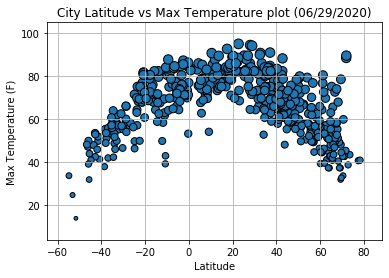

<Figure size 432x288 with 0 Axes>

In [80]:
#Create a Scatter Plot for Lattitude vs Temperature of City
dt = time.strftime("%m/%d/%Y")
plt.scatter(lat, max_temp, marker='o',s=max_temp, edgecolors= "black")
plt.title(f"City Latitude vs Max Temperature plot ({dt})")
plt.ylim(min(clean_city_data["Max Temp"])-10,max(clean_city_data["Max Temp"])+10)
plt.xlim(min(clean_city_data["Lat"])-10, max(clean_city_data["Lat"])+10)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

plt.savefig("Latitude Vs Max Temperature.png", bbox_inches="tight")

## Latitude vs. Humidity Plot

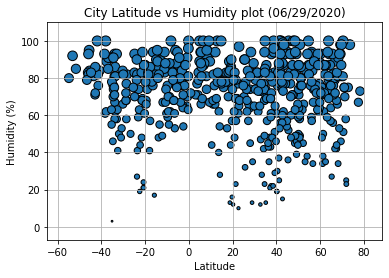

<Figure size 432x288 with 0 Axes>

In [81]:
#Create a Scatter Plot for Lattitude vs Humidity of City
dt = time.strftime("%m/%d/%Y")
plt.scatter(lat, humidity, marker='o',s=humidity, edgecolors= "black")
plt.title(f"City Latitude vs Humidity plot ({dt})")
plt.ylim(min(clean_city_data["Humidity"])-10,max(clean_city_data["Humidity"])+10)
plt.xlim(min(clean_city_data["Lat"])-10, max(clean_city_data["Lat"])+10)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

plt.savefig("Latitude Vs Humidity.png", bbox_inches="tight")

## Latitude vs. Cloudiness Plot

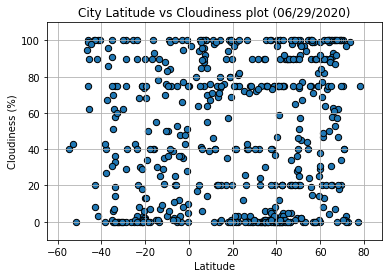

<Figure size 432x288 with 0 Axes>

In [84]:
#Create a Scatter Plot for Lattitude vs Cloudiness of City
dt = time.strftime("%m/%d/%Y")
plt.scatter(lat, cloudiness, marker='o',s=40, edgecolors= "black")
plt.title(f"City Latitude vs Cloudiness plot ({dt})")
plt.ylim(min(clean_city_data["Cloudiness"])-10,max(clean_city_data["Cloudiness"])+10)
plt.xlim(min(clean_city_data["Lat"])-10, max(clean_city_data["Lat"])+10)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

plt.savefig("Latitude Vs Cloudiness.png", bbox_inches="tight")

## Latitude vs. Wind Speed Plot

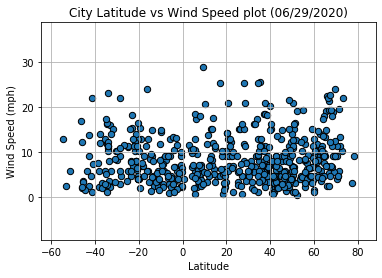

<Figure size 432x288 with 0 Axes>

In [85]:
#Create a Scatter Plot for Lattitude vs Wind Speed of City
dt = time.strftime("%m/%d/%Y")
plt.scatter(lat, wind_speed, marker='o',s=40, edgecolors= "black")
plt.title(f"City Latitude vs Wind Speed plot ({dt})")
plt.ylim(min(clean_city_data["Wind Speed"])-10,max(clean_city_data["Wind Speed"])+10)
plt.xlim(min(clean_city_data["Lat"])-10, max(clean_city_data["Lat"])+10)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

plt.savefig("Latitude Vs Wind Speed.png", bbox_inches="tight")

## Linear Regression

In [117]:
# OPTIONAL: Create a function to create Linear Regression plots
def regressionplot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # regression values
    regress_values = x_values * slope + intercept
    print(f"The r-squared is: {round(rvalue**2,2)}")
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    dt = time.strftime("%m/%d/%Y")
    plt.title(f"{hemisphere} Hemisphere - {y_label} vs. {x_label} Linear Regression Plot ({dt})")
    plt.savefig(f"{hemisphere} Hemisphere {y_label} vs. {x_label} Linear Regression Plot.png", bbox_inches="tight")
    plt.show()
    return

In [118]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]>0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]<0]

# Check point
# equator = clean_city_data.loc[clean_city_data["Lat"] == 0]
# northern_hemisphere.count()
# northern_hemisphere.head()
# southern_hemisphere.count()
# southern_hemisphere.head()
# equator.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.52


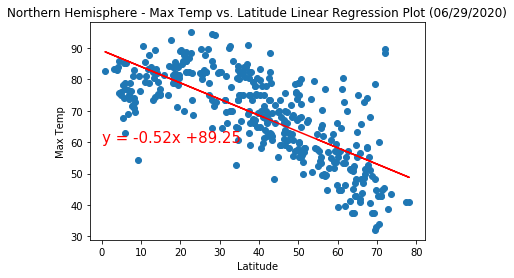

In [135]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
regressionplot(x_values, y_values, "Latitude", "Max Temp", "Northern",(0, 60))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6


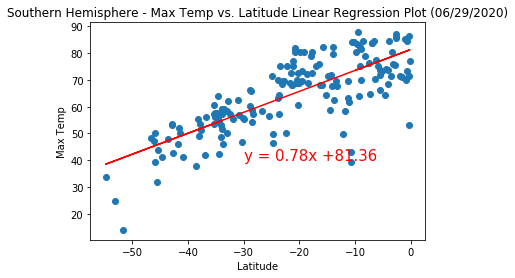

In [121]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
regressionplot(x_values, y_values, "Latitude", "Max Temp", "Southern",(-30, 40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


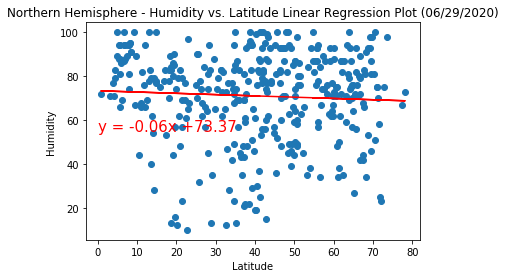

In [136]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
regressionplot(x_values, y_values, "Latitude", "Humidity", "Northern",(0, 55))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


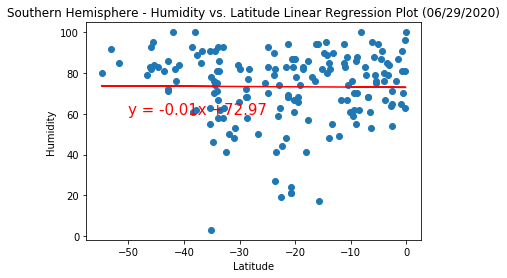

In [133]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
regressionplot(x_values, y_values, "Latitude", "Humidity", "Southern",(-50, 60))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0


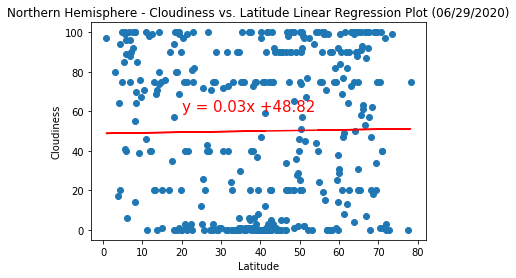

In [127]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
regressionplot(x_values, y_values, "Latitude", "Cloudiness", "Northern",(20, 60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


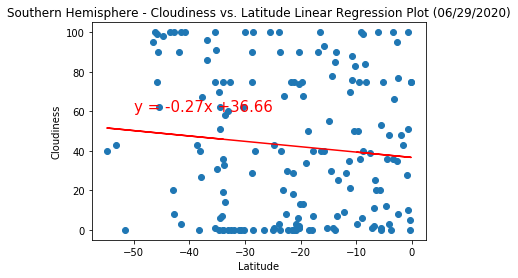

In [129]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
regressionplot(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-50, 60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


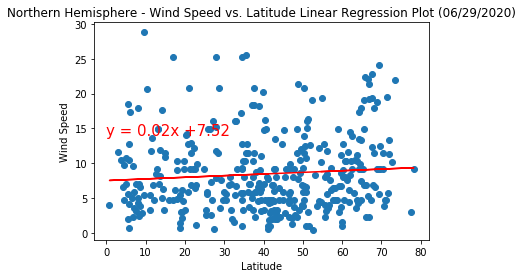

In [137]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
regressionplot(x_values, y_values, "Latitude", "Wind Speed", "Northern",(0, 14))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02


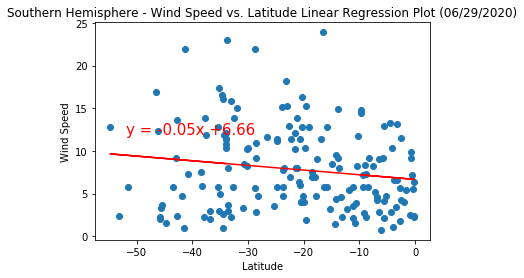

In [145]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
regressionplot(x_values, y_values, "Latitude", "Wind Speed", "Southern",(-52, 12))